# Curso de Capacitação para Cientista de Dados

# Projeto 4 - Python

### Etapa 1 - Definição do problema de negócio
Prever se os clientes cancelarão ou não um plano de um Operadora de Telecom.
Recomendação: Utilização do modelo de Regressão Logística.

### Etapa 2 - Coleta dos dados
Os dados foram disponibilizados pela Data Science Academy. Há dois datasets separados, um com os dados de treino e outro com os dados de teste

In [1]:
# Importando o dataset de treino
import pandas as pd
df = pd.read_csv("projeto4_telecom_treino.csv")

### Etapa 3 - Análise Exploratória

In [2]:
# Verificando os primeiros dados do dataframe
df.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [3]:
# Verificando o tamanho do dataframe
df.shape

(3333, 21)

In [4]:
# Verificando os tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Unnamed: 0                       3333 non-null int64
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes           

In [5]:
# Verificando os dados estatísticos do dataframe
df.describe()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1667.00000,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,962.29855,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,834.00000,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,1667.00000,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2500.00000,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,3333.00000,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Analisando a correlação das variáveis
df.corr()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
Unnamed: 0,1.000000,0.036667,-0.018086,-0.020769,0.000272,-0.020769,0.013872,0.009149,0.013875,0.011295,0.000995,0.011311,0.005822,-0.011221,0.005780,0.009665
account_length,0.036667,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
number_vmail_messages,-0.018086,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total_day_minutes,-0.020769,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total_day_calls,0.000272,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total_day_charge,-0.020769,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total_eve_minutes,0.013872,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total_eve_calls,0.009149,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total_eve_charge,0.013875,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total_night_minutes,0.011295,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


In [7]:
# Analisando a correlação através do mapa

# Importando o pacote gráfico
import matplotlib.pyplot as plt
%matplotlib inline

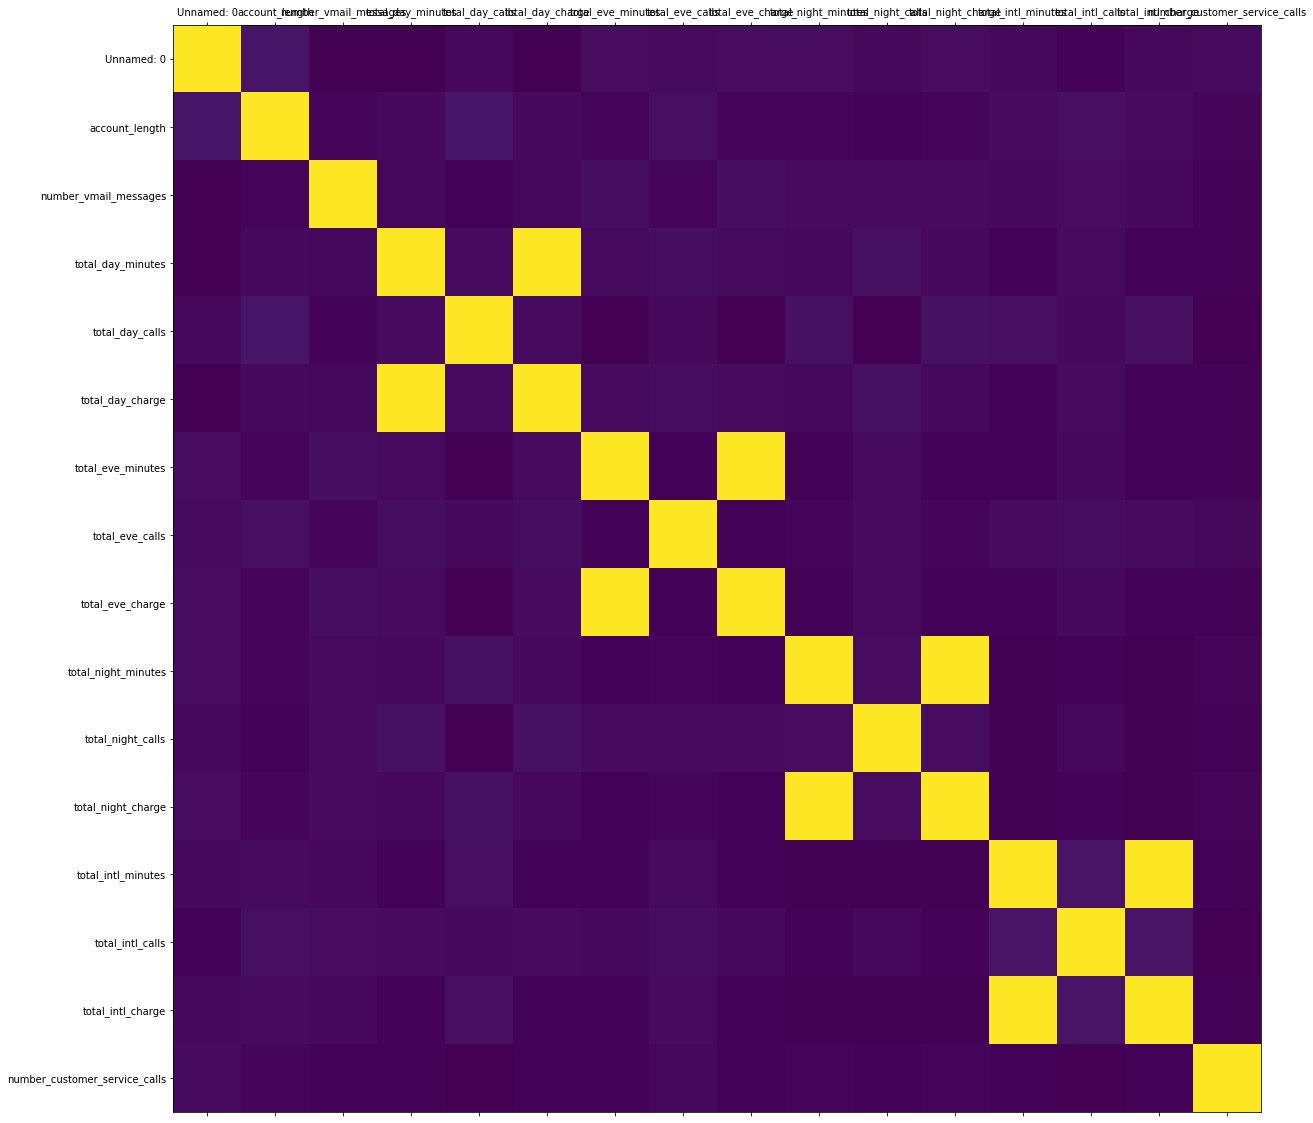

In [8]:
# Plotando a correlação
size=20
corr = df.corr()    
fig, ax = plt.subplots(figsize = (size, size))
ax.matshow(corr)  
plt.xticks(range(len(corr.columns)), corr.columns) 
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Como a variável target e outras variáveis estão como "object", será necessário pré-processar os dados, para, posteriormente, analisar a correlação

In [9]:
# Importando o dataset de teste para visualizar se possuem as mesmas características do dataset de treino
df2 = pd.read_csv("projeto4_telecom_teste.csv")
df2.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [10]:
# Verificando o tamanho do dataset de teste
df2.shape

(1667, 21)

### Etapa 4 - Preparação dos dados
Nesta etapa será feito o pré-processamento dos dados para que os mesmos estejam adequados para o algoritmo.

Antes de manipular os dados, será feito o join dos 2 datasets, para que ambos sejam processados.

In [11]:
# Criando uma coluna no dataset de treino para marcar as colunas como treino
df["divisao"] = "treino"
df.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,divisao
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,no,treino
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,treino
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,treino
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,treino
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,treino


In [12]:
# Criando a mesma coluna no dataset de teste
df2["divisao"] = "teste"
df2.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,divisao
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,no,teste
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,no,teste
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,no,teste
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,no,teste
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,no,teste


In [13]:
# Juntando os datasets
df_novo = pd.concat([df, df2])
df_novo.shape

(5000, 22)

In [14]:
# Verificando a divisão
df_novo.divisao.value_counts()

treino    3333
teste     1667
Name: divisao, dtype: int64

In [15]:
# Verificando os valores únicos da coluna state
df_novo.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [16]:
# Verificando os valores únicos da coluna international_plan
df_novo.international_plan.unique()

array(['no', 'yes'], dtype=object)

In [17]:
# Verificando os valores únicos da coluna voice_mail_plan
df_novo.voice_mail_plan.unique()

array(['yes', 'no'], dtype=object)

In [18]:
# Verificando os valores únicos da coluna churn
df_novo.churn.unique()

array(['no', 'yes'], dtype=object)

In [19]:
# Modificando os dados das colunas "international_plan", "voice_mail_plan" e "churn" para numéricos
df_novo["international_plan"] = df_novo.international_plan.map(lambda linha: 1 if linha == "yes" else 0)
df_novo["voice_mail_plan"] = df_novo.voice_mail_plan.map(lambda linha: 1 if linha == "yes" else 0)
df_novo["churn"] = df_novo.churn.map(lambda linha: 1 if linha == "yes" else 0)
df_novo.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,divisao
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,treino
1,2,OH,107,area_code_415,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,treino
2,3,NJ,137,area_code_415,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,treino
3,4,OH,84,area_code_408,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,treino
4,5,OK,75,area_code_415,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,treino


In [20]:
# Mantendo apenas os códigos das áreas na coluna "area_code"

# Criando a função para remover a string da coluna

import re

def just_num (lista):
    regex_syntax = r"\D"
    num_str = re.sub(regex_syntax, "", lista)
    num = int(num_str)
    return num

In [21]:
# Aplicando a função just_num à coluna "area-code"
df_novo["area_code"] = df_novo["area_code"].apply(just_num)
df_novo.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,divisao
0,1,KS,128,415,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,treino
1,2,OH,107,415,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,treino
2,3,NJ,137,415,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,treino
3,4,OH,84,408,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,treino
4,5,OK,75,415,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,treino


In [22]:
# Verificando os tipos das colunas novamente
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 22 columns):
Unnamed: 0                       5000 non-null int64
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
international_plan               5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes              

Agora todas as colunas que serão utilizadas já estão com o tipo numérico. As colunas Unnamed, state e divisao não serão utilizadas para treinamento do algoritmo, pelos seguintes motivos:
 - Unnamed: Somente ID, não há correlação com as demais variáveis;
 - state: Estado do cliente, também acredito que não há correlação. Além do mais, existe a coluna do código de área que pode substituir, caso tenha alguma correlação com a localidade;
 - divisao: coluna criada apenas para separar o dataset de treino e teste

In [23]:
# Fazendo um somatório das colunas de minutes, calls e charge, a fim de reduzir o dataset
df_novo["total_minutes"] = df_novo["total_day_minutes"] + df_novo["total_eve_minutes"] + df_novo["total_night_minutes"] + df_novo["total_intl_minutes"]
df_novo["total_calls"] = df_novo["total_day_calls"] + df_novo["total_eve_calls"] + df_novo["total_night_calls"] + df_novo["total_intl_calls"]
df_novo["total_charge"] = df_novo["total_day_charge"] + df_novo["total_eve_charge"] + df_novo["total_night_charge"] + df_novo["total_intl_charge"]
df_novo.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,divisao,total_minutes,total_calls,total_charge
0,1,KS,128,415,0,1,25,265.1,110,45.07,...,11.01,10.0,3,2.70,1,0,treino,717.2,303,75.56
1,2,OH,107,415,0,1,26,161.6,123,27.47,...,11.45,13.7,3,3.70,1,0,treino,625.2,332,59.24
2,3,NJ,137,415,0,0,0,243.4,114,41.38,...,7.32,12.2,5,3.29,0,0,treino,539.4,333,62.29
3,4,OH,84,408,1,0,0,299.4,71,50.90,...,8.86,6.6,7,1.78,2,0,treino,564.8,255,66.80
4,5,OK,75,415,1,0,0,166.7,113,28.34,...,8.41,10.1,3,2.73,3,0,treino,512.0,359,52.09


In [24]:
# Separando no dataset apenas as colunas que serão utilizadas no treinamento do modelo
colunas = ["Unnamed: 0", "state", "total_day_minutes", "total_day_calls", "total_day_charge", 
           "total_eve_minutes", "total_eve_calls", "total_eve_charge",
           "total_night_minutes", "total_night_calls", "total_night_charge",
           "total_intl_minutes", "total_intl_calls", "total_intl_charge"]

df_interesse = df_novo.drop(colunas, axis=1)
df_interesse.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,divisao,total_minutes,total_calls,total_charge
0,128,415,0,1,25,1,0,treino,717.2,303,75.56
1,107,415,0,1,26,1,0,treino,625.2,332,59.24
2,137,415,0,0,0,0,0,treino,539.4,333,62.29
3,84,408,1,0,0,2,0,treino,564.8,255,66.80
4,75,415,1,0,0,3,0,treino,512.0,359,52.09


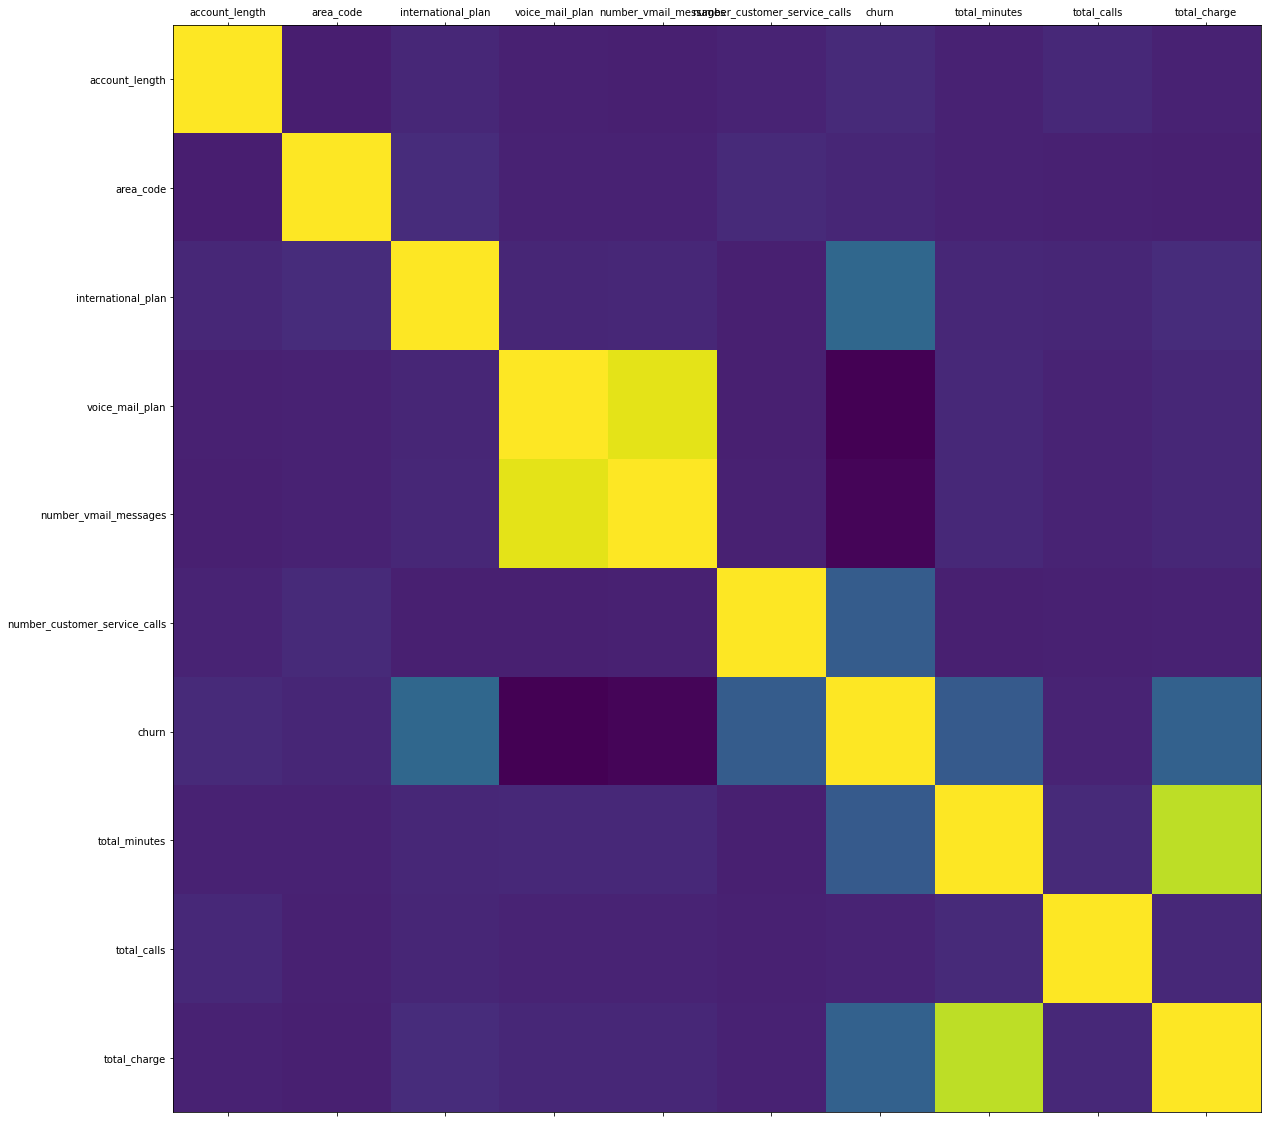

In [25]:
# Verificando a correlação dos dados
size=20
corr = df_interesse.corr()    
fig, ax = plt.subplots(figsize = (size, size))
ax.matshow(corr)  
plt.xticks(range(len(corr.columns)), corr.columns) 
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [26]:
df_interesse.corr()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
account_length,1.000000,-0.018054,0.014681,-0.006650,-0.014575,-0.001445,0.021203,-0.005640,0.018071,-0.004644
area_code,-0.018054,1.000000,0.032107,-0.003006,-0.003399,0.020921,0.010195,-0.006486,-0.010717,-0.013818
international_plan,0.014681,0.032107,1.000000,0.009054,0.011947,-0.012974,0.259123,0.015025,0.009720,0.030184
voice_mail_plan,-0.006650,-0.003006,0.009054,1.000000,0.954508,-0.014453,-0.110698,0.017747,0.000377,0.013017
number_vmail_messages,-0.014575,-0.003399,0.011947,0.954508,1.000000,-0.007086,-0.097633,0.017537,-0.000209,0.014247
number_customer_service_calls,-0.001445,0.020921,-0.012974,-0.014453,-0.007086,1.000000,0.212564,-0.011408,-0.008791,-0.006081
churn,0.021203,0.010195,0.259123,-0.110698,-0.097633,0.212564,1.000000,0.204223,-0.001729,0.235472
total_minutes,-0.005640,-0.006486,0.015025,0.017747,0.017537,-0.011408,0.204223,1.000000,0.020245,0.889622
total_calls,0.018071,-0.010717,0.009720,0.000377,-0.000209,-0.008791,-0.001729,0.020245,1.000000,0.015326
total_charge,-0.004644,-0.013818,0.030184,0.013017,0.014247,-0.006081,0.235472,0.889622,0.015326,1.000000


In [27]:
# Verificando a distribuição das classes
df_interesse.churn.value_counts()

0    4293
1     707
Name: churn, dtype: int64

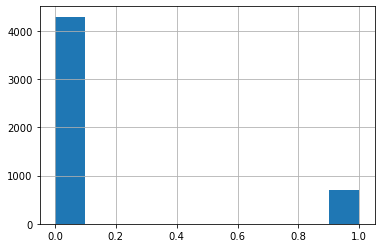

In [28]:
df_interesse["churn"].hist()

In [29]:
# Dividindo o dataset em X_treino, X_teste, Y_treino e Y_teste
X_treino = df_interesse[df_interesse["divisao"] == "treino"].drop(["churn", "divisao"], axis = 1)
X_teste = df_interesse[df_interesse["divisao"] == "teste"].drop(["churn", "divisao"], axis = 1)
Y_treino = df_interesse[df_interesse["divisao"] == "treino"]["churn"]
Y_teste = df_interesse[df_interesse["divisao"] == "teste"]["churn"]

In [30]:
# Verificando o tamanho dos datasets
print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(3333, 9)
(1667, 9)
(3333,)
(1667,)


In [31]:
# Normalizando os dados de entrada de treino e teste
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
data_norm_treino = scaler.fit_transform(X_treino)
data_norm_teste = scaler.fit_transform(X_teste)

In [32]:
# Convertendo os dados normalizados em dataframe novamente
colunas = ["account_length", "area_code", "international_plan", "voice_mail_plan", "number_vmail_messages", 
           "number_customer_service_calls", "total_minutes", "total_calls", "total_charge"]
df_norm_treino = pd.DataFrame(data_norm_treino, columns = colunas)
df_norm_teste = pd.DataFrame(data_norm_teste, columns = colunas)
df_norm_treino.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,total_minutes,total_calls,total_charge
0,0.524793,0.068627,0.0,1.0,0.490196,0.111111,0.720659,0.497778,0.718793
1,0.438017,0.068627,0.0,1.0,0.509804,0.111111,0.567505,0.626667,0.495903
2,0.561983,0.068627,0.0,0.0,0.000000,0.000000,0.424671,0.631111,0.537558
3,0.342975,0.000000,1.0,0.0,0.000000,0.222222,0.466955,0.284444,0.599153
4,0.305785,0.068627,1.0,0.0,0.000000,0.333333,0.379058,0.746667,0.398252


In [33]:
df_norm_teste.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,total_minutes,total_calls,total_charge
0,0.421941,1.000000,0.0,0.0,0.000000,0.428571,0.407568,0.365297,0.228925
1,0.573840,1.000000,0.0,0.0,0.000000,0.000000,0.484505,0.552511,0.570611
2,0.430380,0.000000,0.0,1.0,0.557692,0.142857,0.978018,0.643836,0.908585
3,0.413502,0.068627,0.0,0.0,0.000000,0.142857,0.497838,0.470320,0.510905
4,0.451477,0.068627,0.0,0.0,0.000000,0.285714,0.415135,0.447489,0.412065


### Etapa 5 - Amostragem
Como os dados já estavam divididos em treino e teste, não será necessário separá-los através de amostragem

### Etapa 6 - Treinamento do modelo
Após análise exploratória e pré-processamento, o modelo será criado através do algoritmo Logistic Regression, conforme recomendado inicialmente

In [34]:
# Importando o modelo
from sklearn.linear_model import LogisticRegression

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(df_norm_treino, Y_treino)

LogisticRegression()

### Etapa 7 - Avaliando o modelo
Nesta etapa será verificada a acurácia do modelo

In [35]:
# Verificando a acurácia com a Confusion Matrix

# Importando a função
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fazendo as previsões
previsoes = modelo.predict(df_norm_teste)

# Construindo a Confusion Matrix
CM = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(CM)

[[1395   48]
 [ 179   45]]


In [36]:
# Calculando a acurácia
accuracy_score(Y_teste, previsoes)

0.8638272345530894

In [37]:
# Relatório de classificação
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      1443
           1       0.48      0.20      0.28       224

    accuracy                           0.86      1667
   macro avg       0.69      0.58      0.60      1667
weighted avg       0.83      0.86      0.84      1667



Apesar da acurácia do modelo ter sido muito satisfatória (86%), pode-se perceber com o relatório acima, que o modelo está enviesado, ou seja, aprendeu mais sobre uma classe do que da outra, visto que a classe 0 possuía muito mais dados (vide histograma apresentado no início do notebook). Agora será necessário seguir para a próxima etapa, a fim de otimizar a acurácia do modelo.

### Etapa 8 - Otimização do modelo
Nesta etapa será feito o balanceamento dos dados, a fim de conseguir um melhor resultado do modelo.

Para o balanceamento das classes será utilizado o método Smote, que consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos.

In [38]:
# Carregando a função Smote
from imblearn.over_sampling import SMOTE

In [39]:
# Aplicando o método de Smote sobre os dados de treino e de teste
smt = SMOTE()
df_norm_treino, Y_treino = smt.fit_resample(df_norm_treino, Y_treino)
df_norm_teste, Y_teste = smt.fit_resample(df_norm_teste, Y_teste)

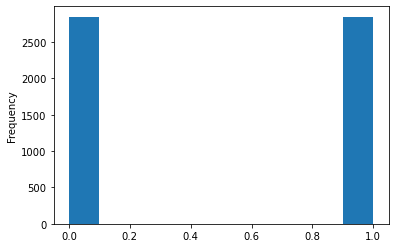

In [40]:
# Visualizando a distribuição das amostras
Y_treino.plot.hist()

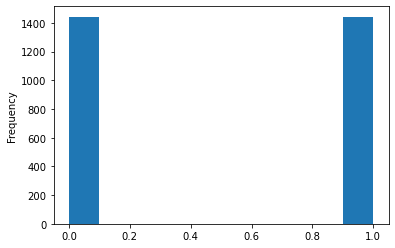

In [41]:
Y_teste.plot.hist()

In [42]:
# Com os dados equilibrados, o modelo pode ser novamente treinado
modelo = LogisticRegression()
modelo.fit(df_norm_treino, Y_treino)

LogisticRegression()

In [43]:
# Fazendo as previsões
previsoes = modelo.predict(df_norm_teste)

# Construindo a Confusion Matrix
CM = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(CM)

[[1032  411]
 [ 148 1295]]


In [44]:
# Calculando a acurácia
accuracy_score(Y_teste, previsoes)

0.8063063063063063

In [45]:
# Relatório de classificação
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1443
           1       0.76      0.90      0.82      1443

    accuracy                           0.81      2886
   macro avg       0.82      0.81      0.80      2886
weighted avg       0.82      0.81      0.80      2886



Após balanceamento dos dados, conseguiu-se uma acurácia de 81%. Porém, será feito o teste com outros modelos para verificar se é possível melhorar a acurácia.

In [46]:
# Criando um modelo com o Decicion Tree

# Importando a função
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Criando o modelo
modelo = DecisionTreeClassifier()
modelo.fit(df_norm_treino, Y_treino)

DecisionTreeClassifier()

In [48]:
# Fazendo as previsões
previsoes = modelo.predict(df_norm_teste)

# Construindo a Confusion Matrix
CM = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(CM)

[[ 967  476]
 [  77 1366]]


In [49]:
# Calculando a acurácia
accuracy_score(Y_teste, previsoes)

0.8083853083853084

In [50]:
# Relatório de classificação
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1443
           1       0.74      0.95      0.83      1443

    accuracy                           0.81      2886
   macro avg       0.83      0.81      0.80      2886
weighted avg       0.83      0.81      0.80      2886



Com o Decision Tree a acurácia foi menor (81%).

In [51]:
# Criando um modelo com o SVM

# Importando a função
from sklearn.svm import SVC

In [52]:
# Criando o modelo
modelo = SVC()
modelo.fit(df_norm_treino, Y_treino)

SVC()

In [53]:
# Fazendo as previsões
previsoes = modelo.predict(df_norm_teste)

# Construindo a Confusion Matrix
CM = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(CM)

[[1122  321]
 [ 118 1325]]


In [54]:
# Calculando a acurácia
accuracy_score(Y_teste, previsoes)

0.8478863478863479

In [55]:
# Relatório de classificação
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1443
           1       0.80      0.92      0.86      1443

    accuracy                           0.85      2886
   macro avg       0.85      0.85      0.85      2886
weighted avg       0.85      0.85      0.85      2886



Com o algoritmo SVM foi possível atingir uma acurácia de 85%.

### Conclusão
O dataset utilizado neste projeto não era muito extenso, porém, já estava dividido em dados de treino e teste.

Como havia necessidade de realizar o pré-processamento dos dados, os datasets foram concatenados para que o trabalho de pré-processamento fosse unificado.

Como pré-processamento foram realizadas as seguintes tarefas: mudança dos tipos das variáveis "international_plan", "voice_mail_plan" e "churn" de categóricas para numéricas, criação de um totalizador para os dados de "minutes", "call" e "charge", normalização dos dados.

Inicialmente, o modelo foi treinado utilizando o algoritmo Logistic Regression, conforme recomendação, e conseguiu-se uma acurácia de 86%. Porém, foi verificado que o modelo estava enviesado, ou seja, ele aprendeu mais de uma classe do que de outra, visto que as classes estavam muito desequilibradas.

Para resolver este problema, foi aplicado ao dataset um método de balanceamento de classes. Visto que os dados da classe 0 eram muito elevados em relação à classe 1, foi utilizado o método Smote, que consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos.

Após este trabalho de balanceamento, os dados foram novamente treinados. Apesar da recomendação ter sido apenas o algoritmo Logistic Regression, três algoritimos foram utilizados neste projeto: Logistic Regression, Decision Tree e SVM.

A acurácia alcançada nestes 3 algoritmos foram de 81%, 81% e 85%, respectivamente.

Logo, dos 3 algoritmos testados, o que apresentou melhor acurácia foi o SVM, alcançando uma marca de 85%, pouco maior que o Logistic Regression, que foi o recomendado.